In [66]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("observation_202403041348.csv")
df.head()

,id,month,day_of_month,day_of_week,hour,minute,non_working_days_before,non_working_days_after,service_id,minutes_from_opening,...,operators_avg_service_time_last_month,operators_avg_service_time_last_hour,weather_type,service_operators_set,wait_duration,priority,is_mobile,is_urgent,wait_duration_class_1,wait_duration_class_2
0,11197627,6,13,2,10,20,0,0,2294,260,...,0.0,0.0,0,0.0,450,4,0,0,8,10
1,11197634,6,13,2,10,20,0,0,2299,260,...,0.0,0.0,0,0.0,2655,17,0,0,45,45
2,11197639,6,13,2,10,21,0,0,2301,261,...,0.0,0.0,0,0.0,645,7,0,0,11,15
3,11197646,6,13,2,10,21,0,0,2302,261,...,0.0,0.0,0,0.0,332,65,0,0,6,10
4,11197653,6,13,2,10,21,0,0,2297,261,...,0.0,0.0,0,0.0,797,8,0,0,14,15


C:\Users\eniko\AppData\Local\Temp\ipykernel_24980\64947848.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["wait_duration_class"]);


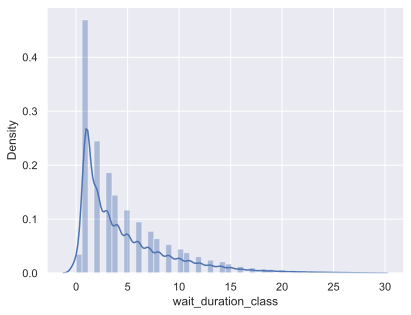

In [11]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("observation_202403031749.csv")
condition = df['wait_duration_class'] < 30
df = df[condition]
df.head()


sns.distplot(df["wait_duration_class"]);
#features = ["wait_duration_class", "priority"]
#df[features].hist(figsize=(30, 4));

C:\Users\eniko\AppData\Local\Temp\ipykernel_24980\3633329354.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["priority"]);


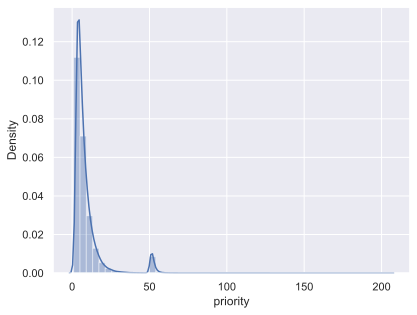

In [12]:
sns.distplot(df["priority"]);

C:\Users\eniko\AppData\Local\Temp\ipykernel_24980\43460113.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["queue_size_total"]);


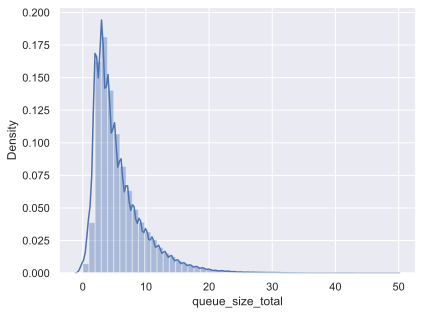

In [13]:
sns.distplot(df["queue_size_total"]);

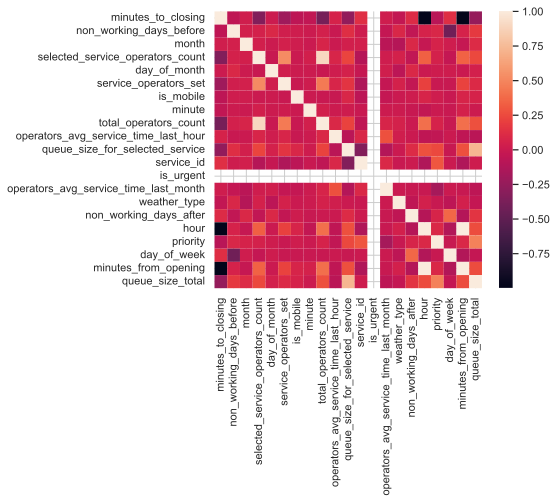

In [62]:
numerical = list(
    set(df.columns)
)

# Calculate and plot
corr_matrix = df[numerical].corr()
plt.subplots(figsize=(6,5))
sns.heatmap(corr_matrix, );

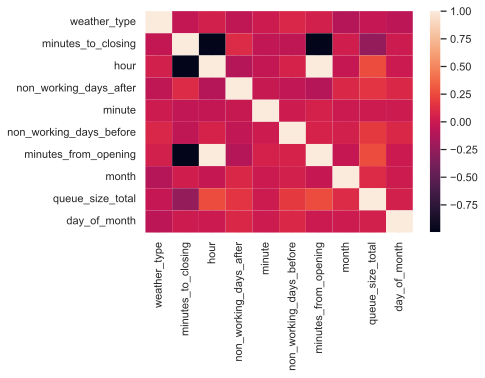

In [65]:
queue_size_estimate_cols = list(
    set(["month","day_of_month", "hour", "minute", "weather_type", "queue_size_total", "minutes_from_opening", "minutes_to_closing", "non_working_days_before", "non_working_days_after"])
)

# Calculate and plot
corr_matrix = df[queue_size_estimate_cols].corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix, );

In [51]:
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("observation_202403031749.csv")
df = df[df["operators_avg_service_time_last_month"] > 0]
df = df[df["operators_avg_service_time_last_hour"] > 0]

y = df["wait_duration_class"]
df.drop(["wait_duration", "wait_duration_class", "id"], axis=1, inplace=True)

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = train_test_split(
    df.values, y, test_size=0.3, random_state=17
)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=20)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

tree_pred = tree.predict(X_holdout)
print(accuracy_score(y_holdout, tree_pred))

knn_pred = knn.predict(X_holdout_scaled)
print(accuracy_score(y_holdout, knn_pred))

0.3172694565423215
0.2965978665656757


In [55]:
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("observation_202403041348.csv")
df = df[df["operators_avg_service_time_last_month"] > 0]
df = df[df["operators_avg_service_time_last_hour"] > 0]

y = df["wait_duration_class_2"]
df.drop(["wait_duration", "wait_duration_class_1", "wait_duration_class_2", "id"], axis=1, inplace=True)

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = train_test_split(
    df.values, y, test_size=0.3, random_state=17
)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=20)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

tree_pred = tree.predict(X_holdout)
print(accuracy_score(y_holdout, tree_pred))

knn_pred = knn.predict(X_holdout_scaled)
print(accuracy_score(y_holdout, knn_pred))

0.7341097014454333
0.7473647667739696
